In [25]:
#!pip install pysd
%pylab inline
%matplotlib inline
import pysd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
e_model = pysd.load('./model-Copy1.py')

Populating the interactive namespace from numpy and matplotlib


/home/danil-pass123/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Simulation

### Model description

In [26]:
e_model.doc()[e_model.doc()['Subs']=='characteristic of companies']

,Real Name,Py Name,Unit,Lims,Type,Subs,Eqn,Comment
9,fruitfulness of marketing,fruitfulness_M,person/contact,"(None, None)",constant,characteristic of companies,0.01,
20,proportion of dissapointed clients,p_dissapointed,,"(None, None)",constant,characteristic of companies,0.25,Probablility that given person is dissapointed...
21,proportion of dissapointed compatitor clients,p_dissapointed_comp,,"(None, None)",constant,characteristic of companies,0.25,Probablility that given person is dissapointed...
22,proportion of satisfied clients,p_satisfied,,"(None, None)",constant,characteristic of companies,0.15,Probablility that given person is satisfied in...
23,proportion of satisfied compatitor clients,p_satisfied_comp,,"(None, None)",constant,characteristic of companies,0.15,Probablility that given person is satisfied in...


### Simulation

In [27]:
def simulate(p11,p13,p21,p23):
    return e_model.run(params = {
        'proportion of dissapointed clients':p13,
        'proportion of dissapointed compatitor clients':p23,
        'proportion of satisfied clients':p11,
        'proportion of satisfied compatitor clients':p21,
    },
        return_columns=['potential_customer_concentration','customer_concentration','compatitor_customer_concentration'])
res = simulate(0.25,0.6,0.1,0.5)
res.head(4)

,potential_customer_concentration,customer_concentration,compatitor_customer_concentration
0,1.000000,0.000000,0.000000
1,0.978000,0.011000,0.011000
2,0.955955,0.023013,0.021032
3,0.933950,0.035988,0.030063


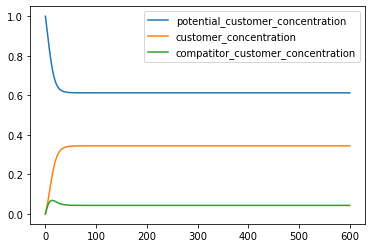

In [28]:
columns =['potential_customer_concentration', 'customer_concentration', 'compatitor_customer_concentration']
def plot_conentration(res):

    plt.plot(res.index, res[columns[0]], label=columns[0])
    plt.plot(res.index, res[columns[1]], label=columns[1])
    plt.plot(res.index, res[columns[2]], label=columns[2])
    plt.legend()
plot_conentration(res)

In [29]:
def calculate_concentration(res):
    zeros = pd.DataFrame(data=np.zeros((1,3)),columns=columns)
    dif = (pd.concat([res,zeros],axis=0,ignore_index=True) - pd.concat([zeros,res],axis=0,ignore_index=True)).drop([0,res.shape[0]],axis=0)
    pos = dif.shape[0]
    for i in range(dif.shape[0]-10):
        avrg_dif = dif.loc[i:i+10].sum()/10
        if abs(avrg_dif[0])<1e-05 and abs(avrg_dif[1])<1e-05 and abs(avrg_dif[2])<1e-05:
            pos = i+5
            break

    M1 = res.loc[pos]['customer_concentration']
    M2 = res.loc[pos]['compatitor_customer_concentration']
    #if M1+M2>1:
    #   print(M1+M2)
    return M1,M2
print(calculate_concentration(res))

(0.3442538545263277, 0.04317119286363023)


### Convergency of model

In [31]:
def calculate_concentration1(res):
    zeros = pd.DataFrame(data=np.zeros((1,3)),columns=columns)
    dif = (pd.concat([res,zeros],axis=0,ignore_index=True) - pd.concat([zeros,res],axis=0,ignore_index=True)).drop([0,res.shape[0]],axis=0)
    pos = dif.shape[0]
    for i in range(dif.shape[0]-10):
        avrg_dif = dif.loc[i:i+10].sum()/10
        if abs(avrg_dif[0])<1e-05 and abs(avrg_dif[1])<1e-05 and abs(avrg_dif[2])<1e-05:
            pos = i+5
            break

    M1 = res.loc[pos]['customer_concentration']
    M2 = res.loc[pos]['compatitor_customer_concentration']
    print(f'system converge at position:{pos}')
    #if M1+M2>1:
    #   print(M1+M2)
    return M1,M2,pos
step = 0.4
conv_pos = []
for p11 in np.arange(0,1,step):
    for p13 in np.arange(0,1,step):
        for p21 in np.arange(0,1,step):
            for p23 in np.arange(0,1,step):
                res = simulate(p11,p13,p21,p23)
                _,_,con = calculate_concentration1(res)
                conv_pos.append(con)
print(f"avarage {sum(conv_pos)/len(conv_pos)}")

system converge at position:352
system converge at position:600
system converge at position:600
system converge at position:32
system converge at position:41
system converge at position:61
system converge at position:18
system converge at position:20
system converge at position:23
system converge at position:600
system converge at position:39
system converge at position:38
system converge at position:28
system converge at position:34
system converge at position:44
system converge at position:18
system converge at position:19
system converge at position:21
system converge at position:600
system converge at position:38
system converge at position:21
system converge at position:26
system converge at position:32
system converge at position:42
system converge at position:18
system converge at position:18
system converge at position:20
system converge at position:32
system converge at position:28
system converge at position:26
system converge at position:23
system converge at position:90
sys

### Generate dataset

In [ ]:
from tqdm.notebook import tqdm, trange
step = 0.1
take_elem = int(pow((1/step),4))
print(take_elem)
X = np.zeros((take_elem,4))
y_company = np.zeros((take_elem,1))
y_compatitor = np.zeros((take_elem,1))

i = 0
iter = tqdm(range(take_elem))
for p11 in np.arange(0,1,step):
    if i >= take_elem:
        break
    for p13 in np.arange(0,1,step):
        if i >= take_elem:
            break
        if p11+p13>=1:
            #print(p11,p13,p21,p23)
            continue
        for p21 in np.arange(0,1,step):
            if i >= take_elem:
                break
            for p23 in np.arange(0,1,step):
                if i >= take_elem:
                    print(i,take_elem)
                    break
                if p11+p13<1 and p21+p23<1:
                    res = simulate(p11,p13,p21,p23)
                    
                    X[i] = [p11,p13,p21,p23]
                    y_company[i],y_compatitor[i] = calculate_concentration(res)
                #else:
                    #print(p11,p13,p21,p23)
                iter.update()
                i+=1
                    #print(i,i/take_elem)

Result of symupation is saved on file and loaded if needed

In [259]:
np.savetxt('dataset_total4.csv',np.concatenate([X[0:i],y_company[0:i],y_compatitor[0:i]],axis = 1),delimiter=',')

## Models

In [2]:
dataset = np.genfromtxt('dataset_total4.csv', delimiter=',')

For model prob -> market share following probabilities are used and finaly market share for each point is drawn at plot bellow

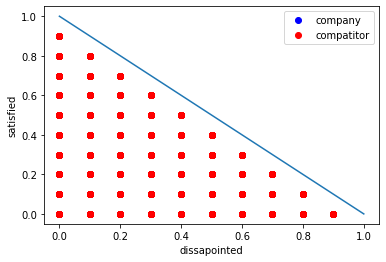

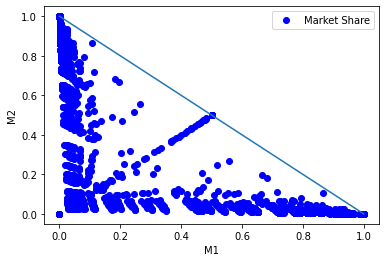

In [8]:
plt.plot(dataset[:,0],dataset[:,1],'o',c = 'b',label = 'company')
plt.plot(dataset[:,2],dataset[:,3],'o',c = 'r',label = 'compatitor')
plt.ylabel("satisfied")
plt.xlabel("dissapointed")
plt.legend()
plt.plot([0,0.5,1],[1,0.5,0],'-')
plt.show()

#plt.plot(0.70,0.12,'o',c = 'r',label = 'point')
plt.plot(dataset[:,4],dataset[:,5],'o',c = 'b',label = 'Market Share')
plt.plot([0,0.5,1],[1,0.5,0],'-')
plt.xlabel("M1")
plt.ylabel("M2")
plt.legend()

plt.show()


### Data preparation
On this section data is prepared for model bellow

In [3]:
dataset = np.genfromtxt('dataset_total4.csv', delimiter=',')
X = dataset[:,0:4]
y_company = dataset[:,4].reshape((dataset.shape[0],1))
y_compatitor = dataset[:,5].reshape((dataset.shape[0],1))

In [4]:
y_company = np.around(y_company,3)
y_compatitor = np.around(y_compatitor,3)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y_company,test_size=0.3,random_state=42,shuffle=True)
x_train_c, x_test_c,y_train_c,y_test_c = train_test_split(X,y_compatitor,test_size=0.3,random_state=42,shuffle=True)

### Model (probability -> market share)
To estimate function g(probability) = market share linear regrassion and SVR is used. Model was evaluated with MAE and MSE

#### Linear Regression

In [11]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

p = preprocessing.PolynomialFeatures(5)
model_l = LinearRegression()
model_l_c = LinearRegression()

#x_train, x_test,y_train,y_test
#x_train_c, x_test_c,y_train_c,y_test_c

model_l.fit(p.fit_transform(x_train), y_train)
y_pred = abs(model_l.predict(p.fit_transform(x_test)))

model_l_c.fit(p.fit_transform(x_train_c), y_train_c)
y_pred_c = abs(model_l_c.predict(p.fit_transform(x_test_c)))

##### evaluate

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

def evaluation(y_test,y_pred,y_test_c,y_pred_c):
    print("MAE")
    print(f"Company's market share {mean_absolute_error(y_test,y_pred)}")
    print(f"Compatitor Company's market share {mean_absolute_error(y_test_c,y_pred_c)}")


    print("MSE")
    print(f"Company's market share {mean_squared_error(y_test,y_pred)}")
    print(f"Compatitor Company's market share {mean_squared_error(y_test_c,y_pred_c)}")

evaluation(y_test,y_pred,y_test_c,y_pred_c)

MAE
Company's market share 0.047810376582450985
Compatitor Company's market share 0.0467314184744747
MSE
Company's market share 0.00877868859020331
Compatitor Company's market share 0.00864587818907129


#### SVR
For SVR different parameters for checked and higher performance was shown by linear kernal and regularization C = 0.5

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param = [{'kernel':('linear','sigmoid'),
         'C':[0.5,1,2,3]
         },
         {'kernel':('poly',),
          'C':[0.5,],
          'degree':[1,2,3]
         }
        ]
grid1 = GridSearchCV(SVR(),param,error_score='raise')
grid1.fit(x_train,y_train.reshape((y_train.shape[0],)))
print("Score and best estimator for model that predict M1")
print(grid1.best_score_)
print(grid1.best_estimator_)

grid2 = GridSearchCV(SVR(),param)
grid2.fit(x_train,y_train_c.reshape((y_train_c.shape[0],)))
print("Score and best estimator for model that predict M2")
print(grid2.best_score_)
print(grid2.best_estimator_)

Score and best estimator for model that predict M1
0.7420550064871818
SVR(C=0.5, kernel='linear')
Score and best estimator for model that predict M2
0.7477564209815603
SVR(C=0.5, kernel='linear')


In [10]:
from sklearn.svm import SVR

model_svr = SVR(C=0.5, kernel='linear')
model_svr.fit(x_train,y_train.reshape((y_train.shape[0],)))
y_pred = model_svr.predict(x_test)
print(y_pred.shape,y_test.shape)

model_svr_c = SVR(C=0.5, kernel='linear')
model_svr_c.fit(x_train_c,y_train_c.reshape((y_train_c.shape[0],)))
y_pred_c = model_svr.predict(x_test_c)

evaluation(y_test,y_pred,y_test_c,y_pred_c)

(1650,) (1650, 1)
MAE
Company's market share 0.14358864760287451
Compatitor Company's market share 0.40876994548481327
MSE
Company's market share 0.033464836107003536
Compatitor Company's market share 0.3016454355599292


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
from torch import nn

class Dataset(Dataset):
    def __init__(self, x,y,train,transform):
        self.x = torch.from_numpy(x)
        self.y = torch.from_numpy(y)
        

    def __len__(self):
        return len(self.x)

    def __getitem__(self, i):
        return self.x[i],self.y[i]
class Model(nn.Model):
    def __init__(self):
        supper().__init__()
        

#### Final model:

In [284]:
p_to_ms_model = model_l
p_to_ms_model_c = model_l_c

### Data preparation
On this section data is prepared for model market share -> probability

In [4]:
dataset = np.genfromtxt('dataset_total4.csv', delimiter=',')
X = dataset[:,4:]
y = dataset[:,0:4]

In [5]:
X = np.around(X,3)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

#model.predict(p.fit_transform(np.array([[0.3, 0.2, 0.2, 0.5]]))), model_c.predict(p.fit_transform(np.array([[0.3, 0.2, 0.2, 0.5]])))

### Model (market share -> probability)

In [7]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

p1 = preprocessing.PolynomialFeatures(3)
model_inv_l = LinearRegression()

#x_train, x_test,y_train,y_test
#x_train_c, x_test_c,y_train_c,y_test_c

model_inv_l.fit(p1.fit_transform(x_train), y_train)
y_pred = model_inv_l.predict(p1.fit_transform(x_test))

#### evaluation

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
print("MAE")
print(f" {mean_absolute_error(y_test,y_pred)}")


print("MSE")
print(f" {mean_squared_error(y_test,y_pred)}")


MAE
 0.07416892139921316
MSE
 0.01697160953614704


### SVR
For SVR parameters was tuned. Finally linear kernal and poly kernal of degree 1 and 2 show best result

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param = [{'kernel':('linear','sigmoid'),
         'C':[0.5,1,2,3]
         },
         {'kernel':('poly',),
          'C':[0.5,],
          'degree':[1,2,3]
         }
        ]
grid1 = GridSearchCV(SVR(),param,error_score='raise')
grid1.fit(x_train,y_train[:,0])
print("Score and best estimator for model that predict p11")
print(grid1.best_score_)
print(grid1.best_estimator_)

grid2 = GridSearchCV(SVR(),param,error_score='raise')
grid2.fit(x_train,y_train[:,1])
print("Score and best estimator for model that predict p13")
print(grid2.best_score_)
print(grid2.best_estimator_)

grid3 = GridSearchCV(SVR(),param,error_score='raise')
grid3.fit(x_train,y_train[:,2])
print("Score and best estimator for model that predict p31")
print(grid3.best_score_)
print(grid3.best_estimator_)

grid4 = GridSearchCV(SVR(),param,error_score='raise')
grid4.fit(x_train,y_train[:,3])
print("Score and best estimator for model that predict p32")
print(grid4.best_score_)
print(grid4.best_estimator_)

Score and best estimator for model that predict p11
0.7068922203355766
SVR(C=0.5, degree=2, kernel='poly')
Score and best estimator for model that predict p13
0.28172908757066295
SVR(C=0.5, kernel='linear')
Score and best estimator for model that predict p31
0.7190889072180704
SVR(C=0.5, degree=2, kernel='poly')
Score and best estimator for model that predict p32
0.2747970105301155
SVR(C=0.5, degree=1, kernel='poly')


In [18]:
from sklearn.svm import SVR

y_pred = []
model_svr1 = SVR(C=0.5, degree=2, kernel='poly')
model_svr1.fit(x_train,y_train[:,0])
y_pred.append(model_svr1.predict(x_test))
#print(y_pred.shape,y_test.shape)


model_svr2 = SVR(C=0.5, kernel='linear')
model_svr2.fit(x_train,y_train[:,1])
y_pred.append(model_svr2.predict(x_test))
#print(y_pred.shape,y_test.shape)


model_svr3 = SVR(C=0.5, degree=2, kernel='poly')
model_svr3.fit(x_train,y_train[:,2])
y_pred.append(model_svr3.predict(x_test))
#print(y_pred.shape,y_test.shape)


model_svr4 = SVR(C=0.5, degree=1, kernel='poly')
model_svr4.fit(x_train,y_train[:,3])
y_pred.append(model_svr4.predict(x_test))


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
print("p11")
print("MAE")
print(f" {mean_absolute_error(y_test[:,0],y_pred[0])}")
print("MSE")
print(f" {mean_squared_error(y_test[:,0],y_pred[0])}")

print("p13")
print("MAE")
print(f" {mean_absolute_error(y_test[:,1],y_pred[1])}")
print("MSE")
print(f" {mean_squared_error(y_test[:,1],y_pred[1])}")

print("p23")
print("MAE")
print(f" {mean_absolute_error(y_test[:,2],y_pred[2])}")
print("MSE")
print(f" {mean_squared_error(y_test[:,2],y_pred[2])}")

print("p23")
print("MAE")
print(f" {mean_absolute_error(y_test[:,3],y_pred[3])}")
print("MSE")
print(f" {mean_squared_error(y_test[:,3],y_pred[3])}")

p11
MAE
 0.09142830628347559
MSE
 0.01514542609029999
p13
MAE
 0.15545324094911905
MSE
 0.04042383697063914
p23
MAE
 0.09137419740653957
MSE
 0.015992252773762785
p23
MAE
 0.1577103859897681
MSE
 0.04293840640319383


In [290]:
ms_to_p_model = model_inv_l

## Pick Market Share
Let's pick `0.62, 0.12` market share and fix compatitor probability `p21 = 0.3, p23 = 0.2`

### Get prob for given market share

In [ ]:
M1,M2 = 0.75,0.12
percent = 0.07
step = 0.01
list_of_prob = np.zeros((0,4))
for x in np.arange(M1-percent,M1+percent,step):
    expr = round(pow(0.07,2)-pow(x-M1,2),5)
    y_min = M2-pow(expr,0.5)
    y_max = M2+pow(expr,0.5)
    for y in np.arange(y_min,y_max,step):
        value = p1.fit_transform(np.array([[x,y]]))
        pred = ms_to_p_model.predict(value)
        if np.all(pred>0):
            list_of_prob = np.append(list_of_prob,ms_to_p_model.predict(value),axis=0)
#list_of_prob
plt.plot(list_of_prob[:,0],list_of_prob[:,1],'o',c = 'b',label = 'company')
plt.plot(list_of_prob[:,2],list_of_prob[:,3],'o',c = 'r',label = 'compatitor')
plt.xlabel("satisfied")
plt.ylabel("dissapointed")
plt.legend()
plt.plot([0,0.5,1],[1,0.5,0],'-')
plt.show()

In [ ]:
value = p.fit_transform(np.array([[0.2,0.4,0.5,0.02]]))
p_to_ms_model.predict(value)

### More detailed grid
build more detaild grid for p11 and p13 from `list_of_prob`. Finally values will be saved to use it later

In [ ]:
min(list_of_prob[:,0]),max(list_of_prob[:,0])

In [ ]:
from tqdm.notebook import tqdm, trange
step = 0.01
p11_min,p11_max = min(list_of_prob[:,0]),max(list_of_prob[:,0])
p13_min,p13_max = min(list_of_prob[:,1]),max(list_of_prob[:,1])

take_elem = int(pow((1/step),2)*(p11_max-p11_min)/step*(p13_max-p13_min)/step)
print(take_elem)


X = np.zeros((take_elem,4))
y_company = np.zeros((take_elem,1))
y_compatitor = np.zeros((take_elem,1))

i = 0
iter = tqdm(range(take_elem))
for p11 in np.arange(p11_min,p11_max,step):
    if i >= take_elem:
        break
    for p13 in np.arange(p13_min,p13_max,step):
        if i >= take_elem:
            break
        if p11+p13>=1:
            #print(p11,p13,p21,p23)
            continue
        for p21 in np.arange(0,1,step):
            if i >= take_elem:
                break
            for p23 in np.arange(0,1,step):
                if i >= take_elem:
                    print(i,take_elem)
                    print(p11,p13,p21,p23)
                    break
                if p11+p13<1 and p21+p23<1:
                    res = simulate(p11,p13,p21,p23)
                    
                    X[i] = [p11,p13,p21,p23]
                    y_company[i],y_compatitor[i] = calculate_concentration(res)
                i+=1
                iter.update()
                

In [ ]:
np.savetxt('dataset_detaild_grid4.csv',np.concatenate([X[0:i],y_company[0:i],y_compatitor[0:i]],axis = 1),delimiter=',')

In [19]:
dataset = np.genfromtxt('dataset_detaild_grid4.csv', delimiter=',')
prob = np.round(dataset[:,0:4],3)
y1 = np.round(dataset[:,4],3)
y2 = np.round(dataset[:,5],3)
(np.unique(y1)).shape

(468,)

### Statistic

In [20]:
print("mean value:")
print(f"company: {y1.mean()}")
print(f"compatitor: {y2.mean()}")

print("variance:")
print(f"company: {y1.var()}")
print(f"compatitor: {y2.var()}")

mean value:
company: 0.22522288628575984
compatitor: 0.21319403936568654
variance:
company: 0.09090827186126856
compatitor: 0.12960262941382933


### Plots

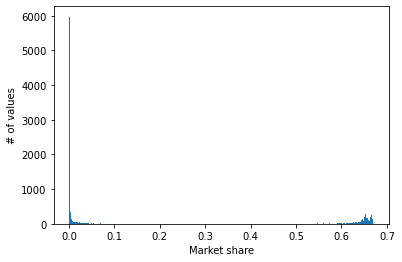

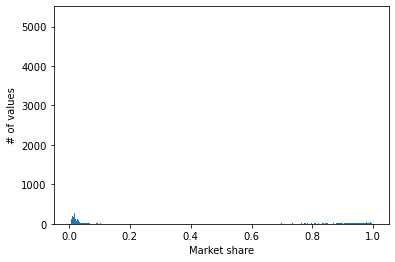

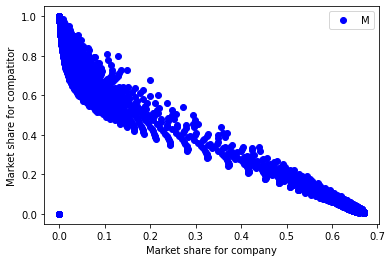

In [21]:
#Plot market share
plt.hist(y1,bins=(np.unique(y1)).shape[0])
plt.ylabel("# of values")
plt.xlabel("Market share")
#plt.legend("Market share for company")
plt.show()

#Plot market share
plt.hist(y2,bins=(np.unique(y2)).shape[0])
plt.ylabel("# of values")
plt.xlabel("Market share")
#plt.legend("Market share for compatitor")
plt.show()

plt.plot(y1,y2,'o',c = 'b',label = "Market share")
plt.ylabel("Market share for compatitor")
plt.xlabel("Market share for company")
plt.legend("Market share")
plt.show()


### Result
Probabilities which give market share which deviade from chosen points (`0.62, 0.2`) with value `0.01`

In [ ]:
prob[mask][:]

In [22]:
mask = np.all([(y1-0.62)<=0.01,(y2-0.2)<=0.01],axis=0)
print(prob[mask])
print(y1[mask])
print(y2[mask])

[[0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 ...
 [0.238 0.297 0.25  0.46 ]
 [0.238 0.297 0.25  0.47 ]
 [0.238 0.297 0.25  0.48 ]]
[0.    0.    0.    ... 0.592 0.597 0.601]
[0.    0.    0.    ... 0.069 0.065 0.061]


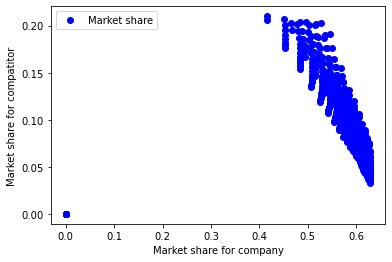

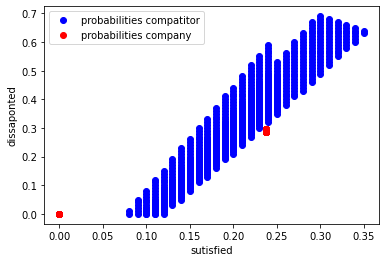

In [23]:
plt.plot(y1[mask],y2[mask],'o',c = 'b',label = "Market share")
plt.ylabel("Market share for compatitor")
plt.xlabel("Market share for company")
plt.legend()
plt.show()
plt.plot(prob[mask][:,2],prob[mask][:,3],'o',c = 'b',label = "probabilities compatitor")
plt.plot(prob[mask][:,0],prob[mask][:,1],'o',c = 'r',label = "probabilities company")

plt.ylabel("dissaponted")
plt.xlabel("sutisfied")
plt.legend()
plt.show()